# Importing libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from kneed import KneeLocator
from yellowbrick.cluster import SilhouetteVisualizer

# Helps plotting graphs (source: BI-ML1, first notebook: 01_tutorial_cs_template)
%matplotlib inline

# Suppress scientific float notation (so 0.000 is printed as 0.)
np.set_printoptions(precision=5, suppress=True)

# Check dataset

* Look at number of columns and rows
    * columns: 18
    * rows: 8950
* Find types of datatypes
    * *object, int64, float64*
* Check how missing values are represented
    * *NaN*

In [65]:
df = pd.read_csv("CC GENERAL.csv")

print("First 10 records")
display(df.head(10))
print(f"-"*30)
print("Basic info")
display(df.info())
print(f"-"*30)
print("Number of uniques records")
display(df.nunique())
print(f"-"*30)
print("Number of null records")
display(df.isnull().sum())

First 10 records


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


------------------------------
Basic info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX           

None

------------------------------
Number of uniques records


CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

------------------------------
Number of null records


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### Data description

In [66]:
with open('data_description.txt') as f:
    contents = f.read()
    print(contents)

The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

CUSTID : Identification of Credit Card holder (Categorical)
BALANCE : Balance amount left in their account to make purchases (
BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
PURCHASES : Amount of purchases made from account
ONEOFFPURCHASES : Maximum purchase amount done in one-go
INSTALLMENTSPURCHASES : Amount of purchase done in installment
CASHADVANCE : Cash in advance given by the user
PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
PURC

# Decide what columns we remove
I decided to remove **CUSTID**
* **CUSTID** <br>
    * we dont need custom id

# Preparing dataset
* Remove columns which we dont need
    * *CUST_ID*
* Decide what to do with missing values
    * Change *NaN* values to median value of their columns

In [67]:
data = df.copy()

# Remove 'CUST_ID' column
data = data.drop('CUST_ID', axis=1)

# Change NaN values to median of values from their columns
missisng_values = []
for i in data.columns:
    if data[i].isnull().sum() > 0:
        missisng_values.append(i)

print(missisng_values)

sim = SimpleImputer(missing_values=np.nan, strategy='median')
display(data.loc[[3]])
for i in missisng_values:
    data[i] = sim.fit_transform(data[i].values.reshape(-1,1))
display(data.loc[[3]])

['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,1666.670542,0.636364,1499.0,1499.0,0.0,205.788017,0.083333,0.083333,0.0,0.083333,1,1,7500.0,0.0,NaN,0.0,12


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,1666.670542,0.636364,1499.0,1499.0,0.0,205.788017,0.083333,0.083333,0.0,0.083333,1,1,7500.0,0.0,312.343947,0.0,12


# Prepare standardized/normalized data
### StandardScaler

In [68]:
scaler_sc = StandardScaler().fit(data)
scaled_df_sc = scaler_sc.transform(data)
data_sc = pd.DataFrame(scaled_df_sc, columns=data.columns)

### MinMaxScaler

In [69]:
scaler_mm = MinMaxScaler().fit(data)
scaled_df_mm = scaler_mm.transform(data)
data_mm = pd.DataFrame(scaled_df_mm, columns=data.columns)

### Creating a custom implementation of KMeans

### Sklearn KMeans implementation
* Find best **k**
    * Elbow method
    * KneeLocator
* Show k clusters
    * Table
    * Graph
* Show silhouette 
    * Score
    * Graph

In [70]:
# find the appropriate cluster number
# (plot function taken from labs in BI-ML1)
def plot_elbow(data, explore):
    plt.figure(figsize=(6, 4))
    # test from 2 to 'explore'
    ix = np.zeros(explore)
    iy = np.zeros(explore)
    for k in range(ix.shape[0]):
        kmeans = KMeans(n_clusters=k+1, init='k-means++', random_state=42)
        kmeans.fit(data)
        iy[k] = kmeans.inertia_
        ix[k] = k+1

    # find best value for k
    # https://stackoverflow.com/questions/51762514/find-the-elbow-point-on-an-optimization-curve-with-python
    kn = KneeLocator(ix, iy, curve='convex', direction='decreasing')

    plt.xlabel('$k$')
    plt.ylabel('Účelová funkce')
    plt.plot(ix, iy, 'o-')
    plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
    plt.show()

    print(f"Ideal k = {kn.knee}")

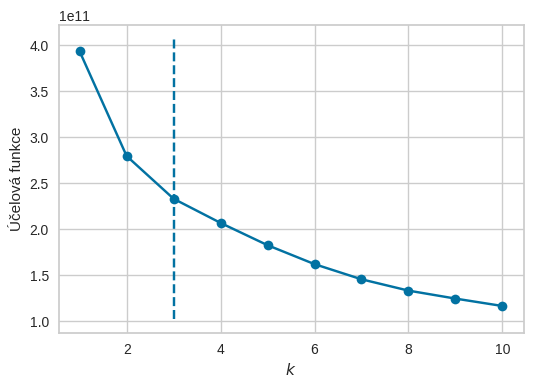

Ideal k = 3.0


In [71]:
explore = 10
plot_elbow(data, explore)

By looking at graph its hard to decide where is elbow. We will pick **k** based on 'KneeLocator' value.

In [72]:
k = 3

In [73]:
def cluster_data(data, k):
    cluster_dataset=data

    kmeans=KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans_fit=kmeans.fit_predict(data)

    # "y_kmeans+1" -> to start index with 1 instead of 0
    cluster=pd.DataFrame(kmeans_fit+1)
    cluster_dataset['cluster']=cluster

    # Mean of clusters
    cluster_mean_dataset=pd.DataFrame(round(cluster_dataset.groupby('cluster').mean(), 1))
    display(cluster_mean_dataset)

In [74]:
cluster_data(data, k)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
1,856.3,0.9,605.6,313.7,292.2,495.5,0.5,0.2,0.4,0.1,2.3,10.7,2757.0,998.4,562.1,0.2,11.4
2,3408.9,0.9,1585.8,991.3,594.8,2127.5,0.5,0.3,0.4,0.2,5.8,22.2,9022.9,2906.5,1561.2,0.1,11.7
3,4841.9,0.9,10789.3,7619.7,3169.8,5152.2,0.8,0.6,0.6,0.2,9.2,86.2,12465.8,18117.4,2510.8,0.3,11.8


### From table above we can see:
* cluster 1 = Clients have **least** *(less than others)* 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PAYMENTS', etc.

* cluster 2 = Clients have **average** 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PAYMENTS', etc.

* cluster 3 = Clients have **most** *(more than others)* 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PAYMENTS', etc.

In [75]:
# (plot function taken from labs in BI-ML1)
def plot_kmean(data, k, title):
    kmeans = KMeans(n_clusters=k, random_state = 1)
    kmeans.fit(data)

    plt.scatter(data.iloc[:,0], data.iloc[:,1], c=kmeans.labels_, cmap='brg', alpha=0.4)
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c = 'black', s=100)
    plt.title(title)
    plt.show()

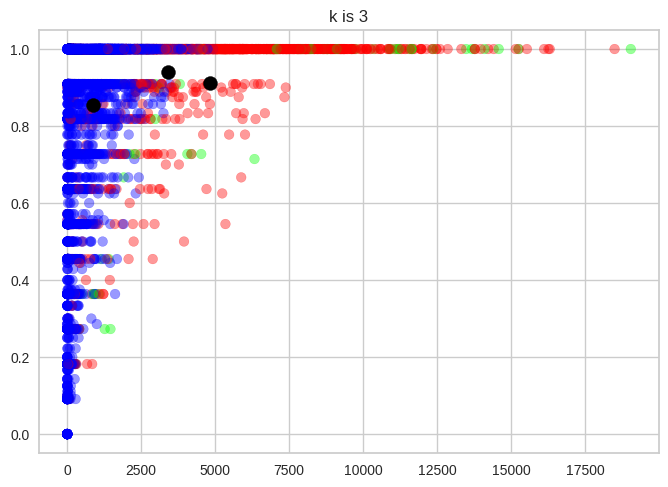

In [76]:
plot_kmean(data, k, f"k is {k}")

In [77]:
def plot_silhouette(data, kmeans):
    kmeans.fit(data)
    score = silhouette_score(data, kmeans.labels_, metric='euclidean')
    print(f"Silhouette score is {score:.3}")

    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(data)
    visualizer.show()

Silhouette score is 0.467


/home/lukas/anaconda3/envs/viz/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


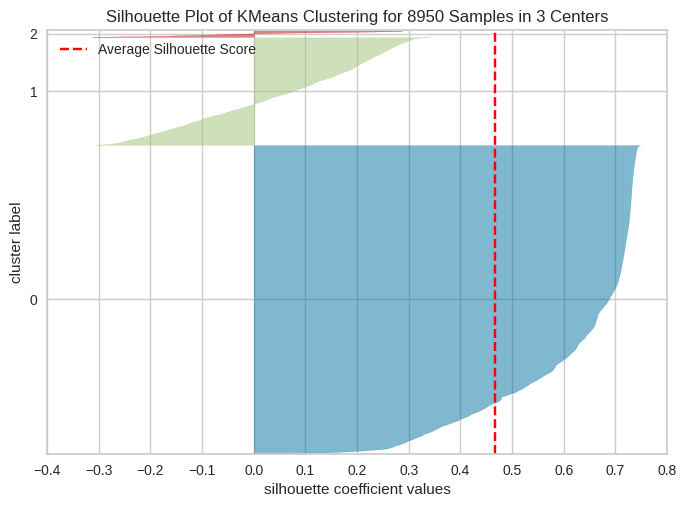

In [78]:
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
plot_silhouette(data, kmeans)

### Hierarchical clustering
* Show k clusters
    * Graph
        * method = "single", "complete", "average", "ward"
        * criterion = "maxclust", "distance"
        * metric = "euclidean"
    * Dendogram *(cut)*
        * method = "complete", "ward"
* Analyze quality of clusters
    * Silhouette (clustering)

In [79]:
def plot_hier(Z, k, criterion1, criterion2, title1, title2):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

    k_clusters = fcluster(Z, k, criterion=criterion1)
    ax1.scatter(data.iloc[:,0], data.iloc[:,1], c=k_clusters, cmap="brg", alpha=0.4)
    ax1.set_title(title1)

    clusters = fcluster(Z, k, criterion=criterion2)
    ax2.scatter(data.iloc[:,0], data.iloc[:,1], c=clusters, cmap="brg", alpha=0.4)
    ax2.set_title(title2)

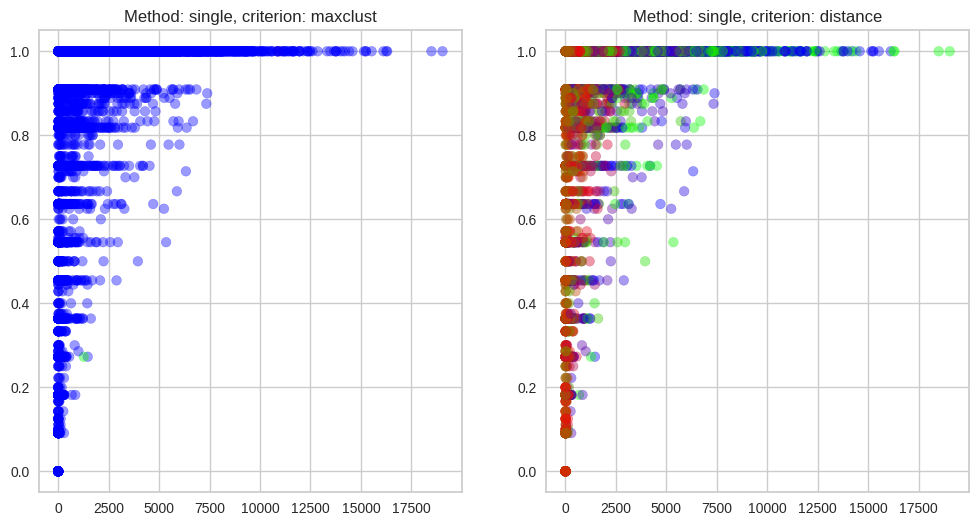

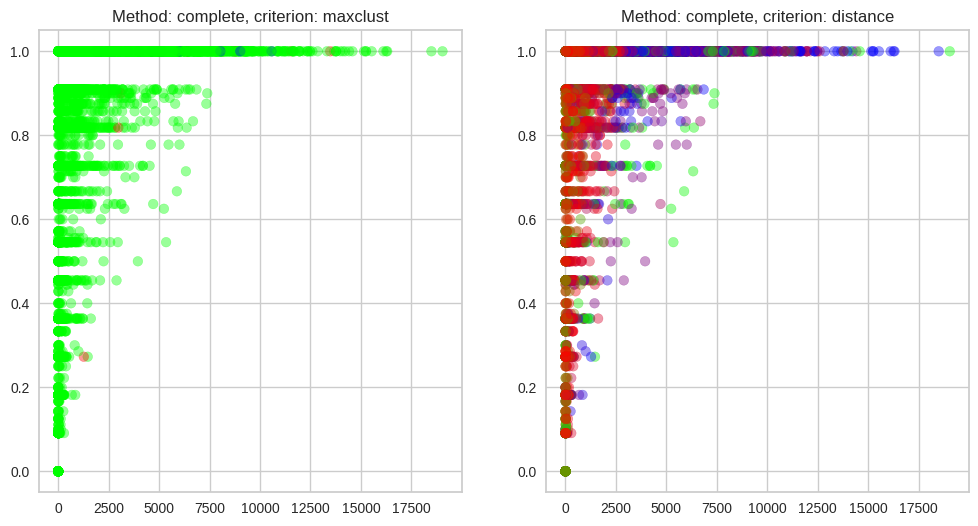

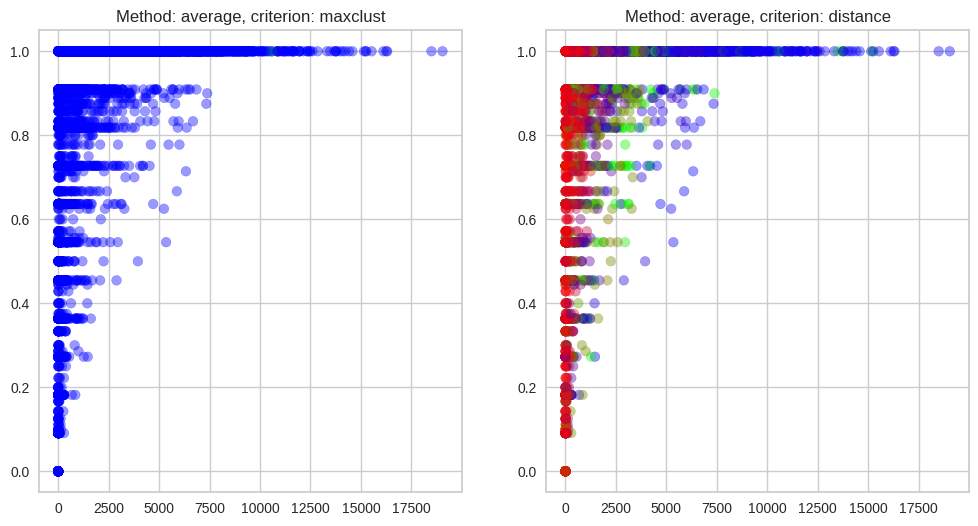

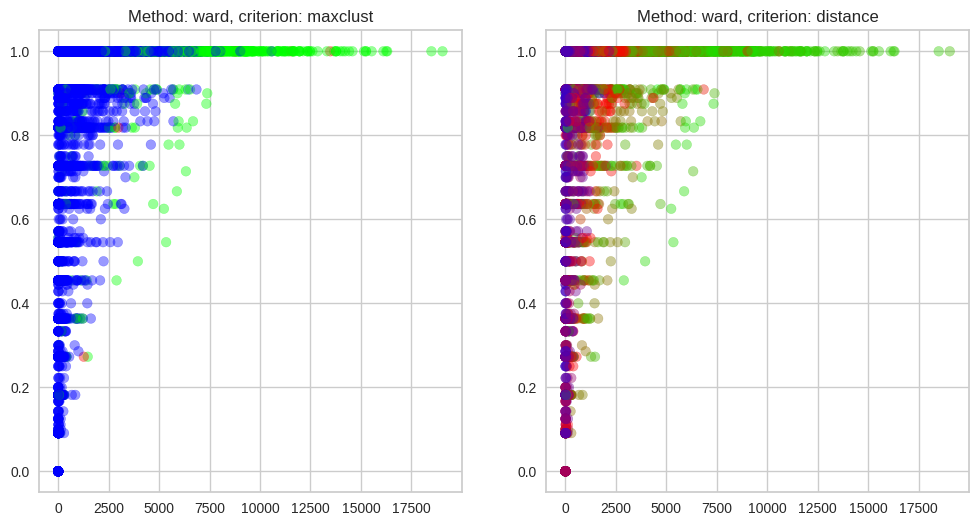

In [80]:
method = ["single", "complete", "average", "ward"]
criterion = ["maxclust", "distance"]

Z0 = linkage(data, method=method[0], metric="euclidean")
Z1 = linkage(data, method=method[1], metric="euclidean")
Z2 = linkage(data, method=method[2], metric="euclidean")
Z3 = linkage(data, method=method[3], metric="euclidean")

plot_hier(Z0, k, criterion[0], criterion[1], 
f"Method: {method[0]}, criterion: {criterion[0]}", 
f"Method: {method[0]}, criterion: {criterion[1]}")

plot_hier(Z1, k, criterion[0], criterion[1], 
f"Method: {method[1]}, criterion: {criterion[0]}", 
f"Method: {method[1]}, criterion: {criterion[1]}")

plot_hier(Z2, k, criterion[0], criterion[1], 
f"Method: {method[2]}, criterion: {criterion[0]}", 
f"Method: {method[2]}, criterion: {criterion[1]}")

plot_hier(Z3, k, criterion[0], criterion[1], 
f"Method: {method[3]}, criterion: {criterion[0]}", 
f"Method: {method[3]}, criterion: {criterion[1]}")

In [81]:
def plot_dendrogram_hier(data, method, title):
    H_cluster = linkage(data, method)
    plt.title(f"Dendrogram of hierarchical clustering ({title} method)")
    plt.xlabel('sample index')
    plt.ylabel('distance')
    dendrogram(H_cluster, truncate_mode='lastp', p=12, 
    leaf_rotation=90., leaf_font_size=12., show_contracted=True)
    plt.show()

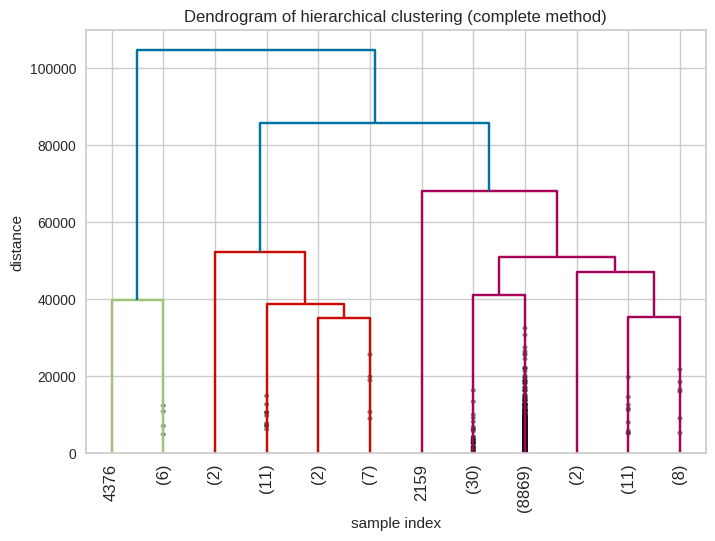

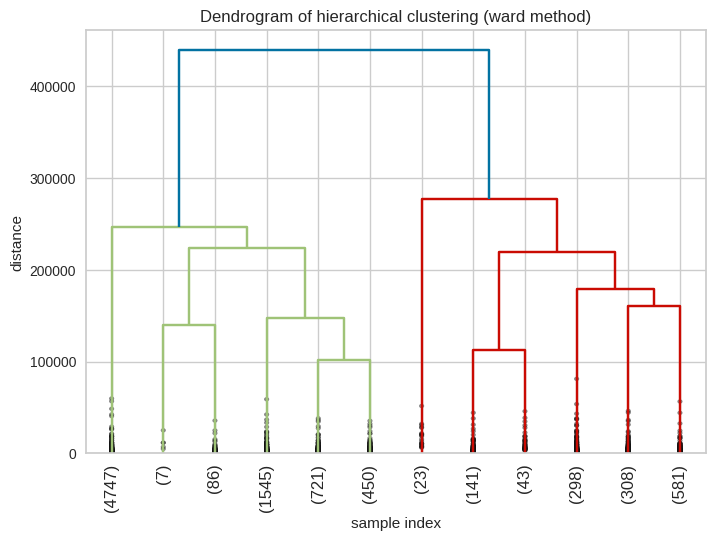

In [82]:
# "complete" method
plot_dendrogram_hier(data, method[1], "complete")
# "ward" method
plot_dendrogram_hier(data, method[3], "ward")

### Testing standardized data
* Sklearn KMeans implementation
    * Find best k
        * KneeLocator
    * Show k clusters
        * Table
* Hierarchical clustering
    * Show k clusters
        * Dendogram *(cut)*
            * method = "complete", "ward"

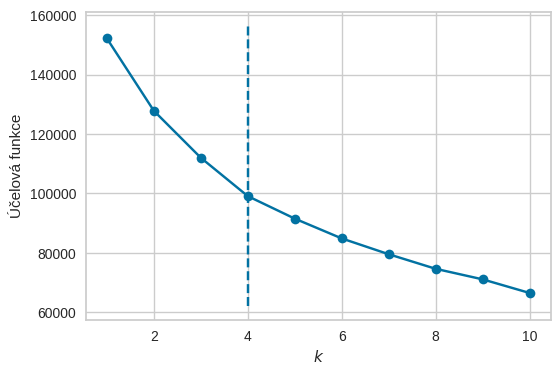

Ideal k = 4.0


In [83]:
plot_elbow(data_sc, explore)

In [84]:
k_sc = 4

In [85]:
cluster_data(data_sc, k_sc)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
1,-0.3,0.2,0.1,0.0,0.3,-0.4,1.0,0.3,0.9,-0.5,-0.4,0.3,-0.1,-0.1,-0.1,0.4,0.1
2,1.5,0.4,-0.2,-0.2,-0.3,1.7,-0.5,-0.2,-0.4,1.7,1.6,-0.3,0.8,0.6,0.5,-0.4,-0.1
3,-0.3,-0.4,-0.3,-0.2,-0.4,-0.2,-0.8,-0.4,-0.7,-0.1,-0.2,-0.5,-0.3,-0.3,-0.1,-0.3,-0.1
4,1.0,0.5,3.1,2.7,2.4,-0.2,1.1,1.8,1.1,-0.3,-0.2,3.0,1.4,1.9,0.5,0.5,0.3


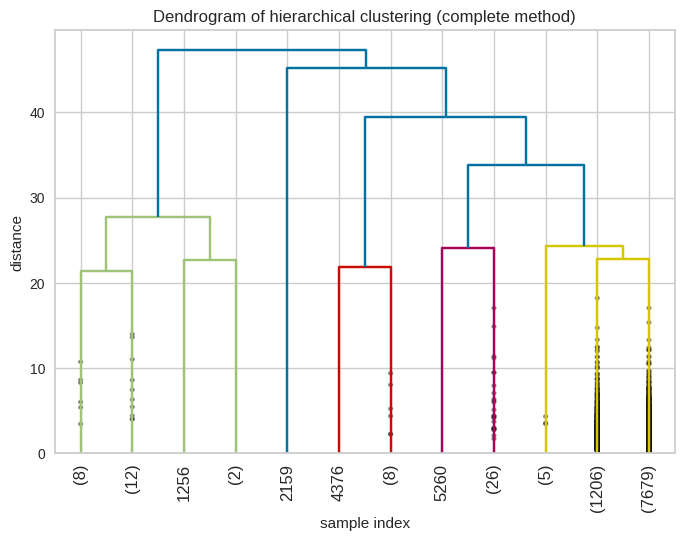

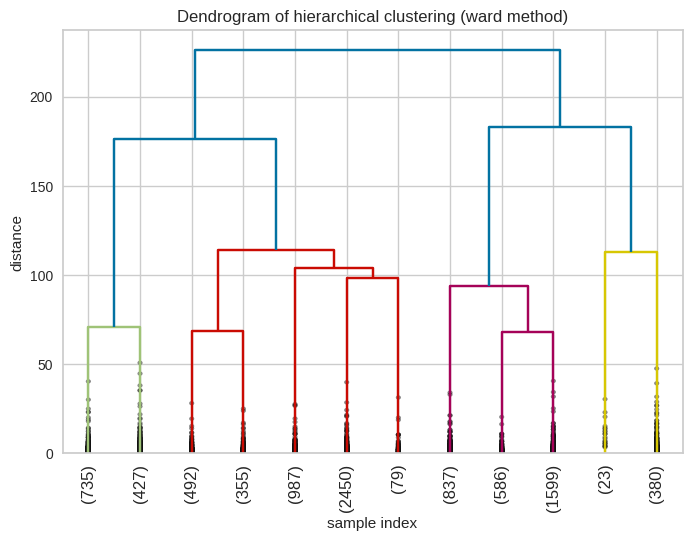

In [86]:
# "complete" method
plot_dendrogram_hier(data_sc, method[1], "complete")
# "ward" method
plot_dendrogram_hier(data_sc, method[3], "ward")

Silhouette score is 0.243


/home/lukas/anaconda3/envs/viz/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


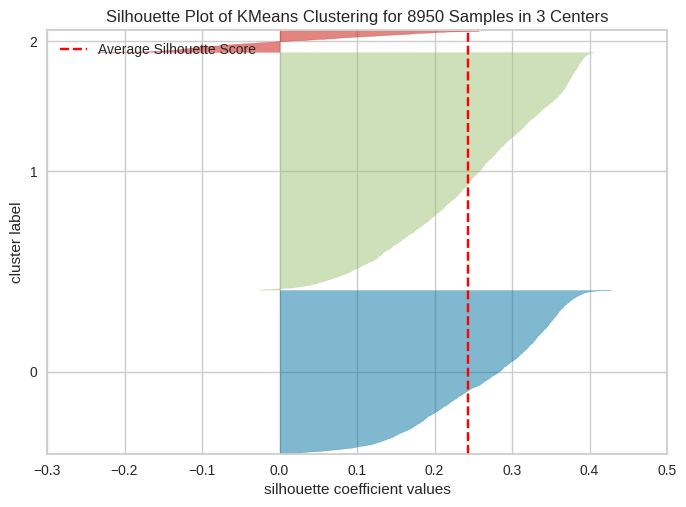

In [87]:
plot_silhouette(data_sc, kmeans)

### Testing normalized data
* Sklearn KMeans implementation
    * Find best k
        * KneeLocator
    * Show k clusters
        * Table
* Hierarchical clustering
    * Show k clusters
        * Dendogram *(cut)*
            * method = "complete", "ward"

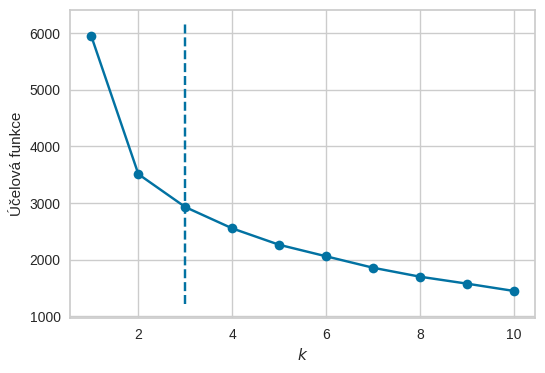

Ideal k = 3.0


In [88]:
plot_elbow(data_mm, explore)

In [89]:
k_mm = 3

In [90]:
cluster_data(data_mm, k_mm)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
1,0.1,0.8,0.0,0.0,0.0,0.0,0.1,0.1,0.1,0.1,0.0,0.0,0.1,0.0,0.0,0.1,0.9
2,0.1,0.9,0.0,0.0,0.0,0.0,0.9,0.1,0.8,0.0,0.0,0.1,0.1,0.0,0.0,0.2,0.9
3,0.1,1.0,0.1,0.1,0.0,0.0,0.9,0.8,0.5,0.1,0.0,0.1,0.2,0.1,0.0,0.3,1.0


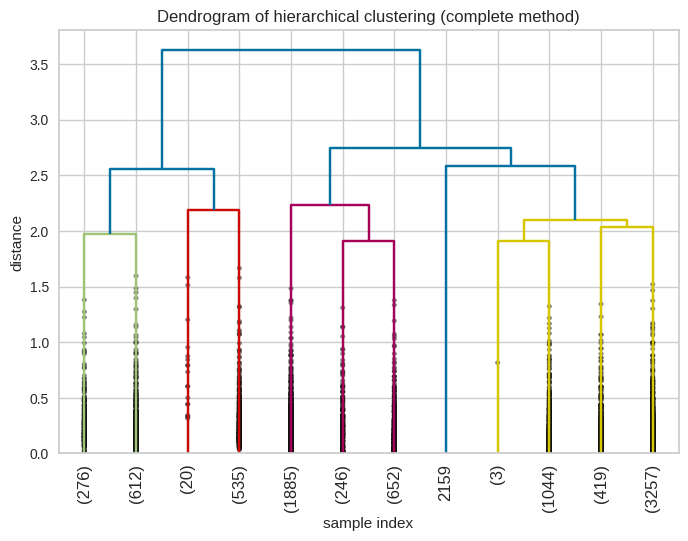

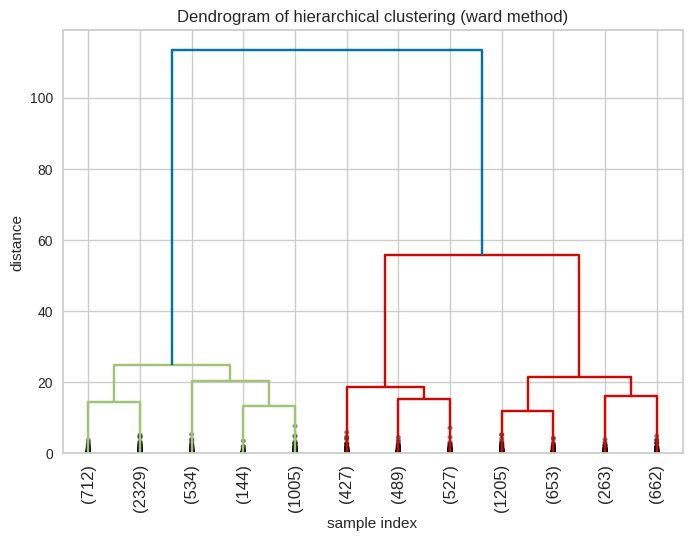

In [91]:
# "complete" method
plot_dendrogram_hier(data_mm, method[1], "complete")
# "ward" method
plot_dendrogram_hier(data_mm, method[3], "ward")

Silhouette score is 0.533


/home/lukas/anaconda3/envs/viz/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


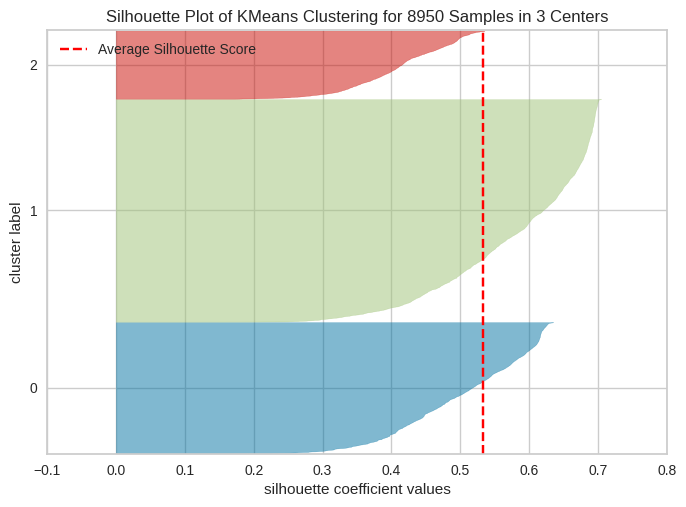

In [92]:
plot_silhouette(data_mm, kmeans)

### Picking best clustering

In [93]:
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)

In [94]:
def get_silhouette_score(data, kmeans, k, type):
    kmeans.fit(data)
    score = silhouette_score(data, kmeans.labels_, metric='euclidean')
    print(f"Silhouette score of {type} is {score:.3} with k = {k}")

In [95]:
get_silhouette_score(data, kmeans, k, "basic data")

Silhouette score of basic data is 0.467 with k = 3


In [96]:
get_silhouette_score(data_sc, kmeans, k_sc, "basic standardized data")

Silhouette score of basic standardized data is 0.243 with k = 4


In [97]:
get_silhouette_score(data_mm, kmeans, k_mm, "basic normalized data")

Silhouette score of basic normalized data is 0.533 with k = 3


Based on **Silhouette score** I think best clustering is with normalized data. *("1" is a perfect match to its cluster and "-1" a perfect mismatch.)*

### Final clusters

In [98]:
cluster_data(data_mm, k_mm)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
1,0.1,0.9,0.0,0.0,0.0,0.0,0.9,0.1,0.8,0.0,0.0,0.1,0.1,0.0,0.0,0.2,0.9
2,0.1,0.8,0.0,0.0,0.0,0.0,0.1,0.1,0.1,0.1,0.0,0.0,0.1,0.0,0.0,0.1,0.9
3,0.1,1.0,0.1,0.1,0.0,0.0,0.9,0.8,0.5,0.1,0.0,0.1,0.2,0.1,0.0,0.3,1.0


* cluster 1 = Clients have **average** account activities

* cluster 2 = Clients have **least** account activities 

* cluster 3 = Clients have **most** account activities